<a href="https://colab.research.google.com/github/hamoud-Hmd/ADL_google_colab/blob/main/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 – TensorFlow Basics

### Deadline Tuesday, May 6, 2025 at 11:59 p.m.

# IMPORTANT SUBMISSION INSTRUCTIONS

- When you're done, download the notebook and rename it to task01_name.ipynb
- Only submit the ipynb file, no other file is required
- The deadline is strict
- Minimal requirement for passing: solving all code cells.

Implementation
- Do not change the cells which are marked as "Do not change", similarly write your solution to the marked cells. Do not create additional cells.

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a classification model based on the perceptron algorithm.

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [Scikit-learn Tutorials](https://www.tensorflow.org/tutorials)
*   [TensorFlow Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Imports

Jupyter notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns


## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print(gpus)
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Go to Edit -> Notebook settings -> Select GPU as Hardware accelerator.

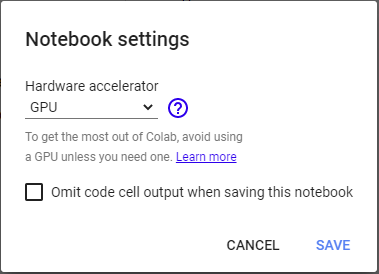

Now check the availability again.

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Choose your device for computation. CPU or one of your CUDA devices

In [ ]:
tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 1.1

## Tensors

Let us create a tensorflow tensor:

In [4]:
a = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

and find out what the properties of this tensor 'a' are.

In [5]:
# TODO print the array
print(a)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [6]:
# TODO print its type
print(type(a))


<class 'tensorflow.python.framework.ops.EagerTensor'>


In [7]:
# TODO print its shape
print(a.shape)

(2, 2)


In [8]:
# TODO convert the tensor to a numpy array and print its size again
a_numpy = a.numpy()
print(a_numpy.shape)

(2, 2)


Let's create another tensor and do a few basic math operation.

In [9]:
b = tf.constant([[1.0, 1.0],
                 [1.0, 1.0]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32) 



In [10]:
# or
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[3. 3.]
 [7. 7.]], shape=(2, 2), dtype=float32) 



Now, let's do the following operations on tensor 'a'.
**Note:** Do not convert the tensors to NumPy.

In [11]:
# TODO compute the mean
print(tf.reduce_mean(a))


tf.Tensor(2.5, shape=(), dtype=float32)


In [12]:
# TODO find the index of the smallest value
print(tf.argmin(tf.reshape(a, [-1])))


tf.Tensor(0, shape=(), dtype=int64)


In [13]:
# TODO compute the log
print(tf.math.log(a))


tf.Tensor(
[[0.        0.6931472]
 [1.0986123 1.3862944]], shape=(2, 2), dtype=float32)


In [14]:
# TODO print out a single value from the tensor
print(a[0, 1].numpy())


2.0


In [15]:
# TODO reshape the tensor to a new shape
reshaped = tf.reshape(a, [4, 1])
reshaped


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.],
       [4.]], dtype=float32)>

# Subtask 1.2

## Variables
A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like tf.keras use tf.Variable to store model parameters.

In [16]:
numpyarray = np.arange(10).reshape(2, 5)
# create a tensorflow variable
a = tf.Variable(numpyarray, dtype=tf.float32)


**TODO Your answer here**

Is tensor 'a' a trainable variable and what does it mean?

**TODO Your answer here**

Yes a is a trainable variable, this means TensorFlow will track it during training. its value can be updated by optimizers and it behaves like a tensor but with mutable state.


### Placing variables

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible, however, you can override this.

In [17]:
with tf.device('CPU:0'):
  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = a @ b

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [18]:
# TODO create two tf.variables using device 'CPU:0' and do matrix multiplication on device 'GPU:0'

with tf.device('GPU:0'):
    d = tf.matmul(a, b)

print(d)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


# Subtask 1.3

### Loading the flood dataset

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
wdir = '/content/drive/MyDrive/ADL/Lecture_01/'
with open(wdir + 'foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/MyDrive/ADL/Lecture_01/foo.txt

Hello Google Drive!

In [21]:
data = pd.read_csv(wdir + 'Flood_Data_Classification.csv')
data

,Margarethenklippe,Sennhuette,labels
0,6.5,4.1,0.0
1,6.4,4.1,0.0
2,6.3,3.9,0.0
3,6.3,3.9,0.0
4,6.4,4.1,0.0
...,...,...,...
6245,6.9,3.3,0.0
6246,6.9,3.4,0.0
6247,6.8,3.5,0.0
6248,6.7,3.2,0.0


# Subtask 1.4

### Inspect the data
Let us plot the data for each of the variables and color them based on the labels:

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

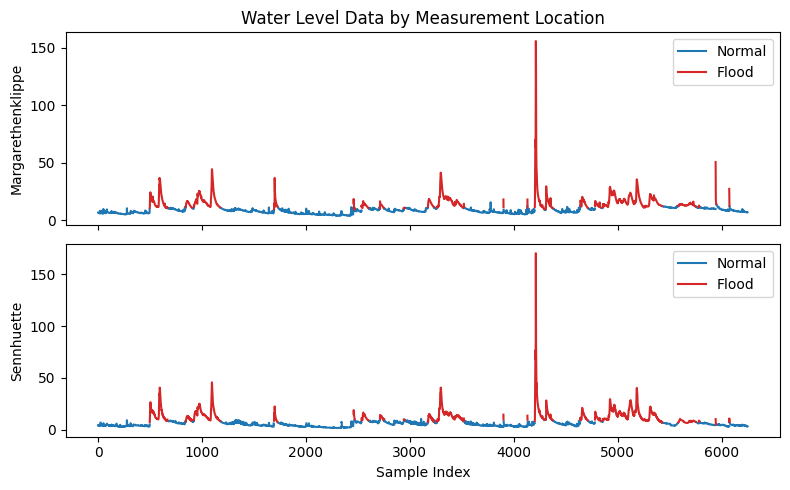

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)


# Plot for Normal data (label=0)
ax[0].plot(np.where(data['labels']==0, data['Margarethenklippe'], None), color='tab:blue', label='Normal')
ax[0].plot(np.where(data['labels']==1, data['Margarethenklippe'], None), color='tab:red', label='Flood')
ax[0].set_ylabel('Margarethenklippe')
ax[0].set_title('Water Level Data by Measurement Location')
ax[0].legend()

# Plot for Sennhuette data
ax[1].plot(np.where(data['labels']==0, data['Sennhuette'], None), color='tab:blue', label='Normal')
ax[1].plot(np.where(data['labels']==1, data['Sennhuette'], None), color='tab:red', label='Flood')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Sennhuette')
ax[1].legend()

plt.tight_layout()
plt.show()

Moreover, it is beneficial to plot the pairwise correlation of the variables to see how they are correlated.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

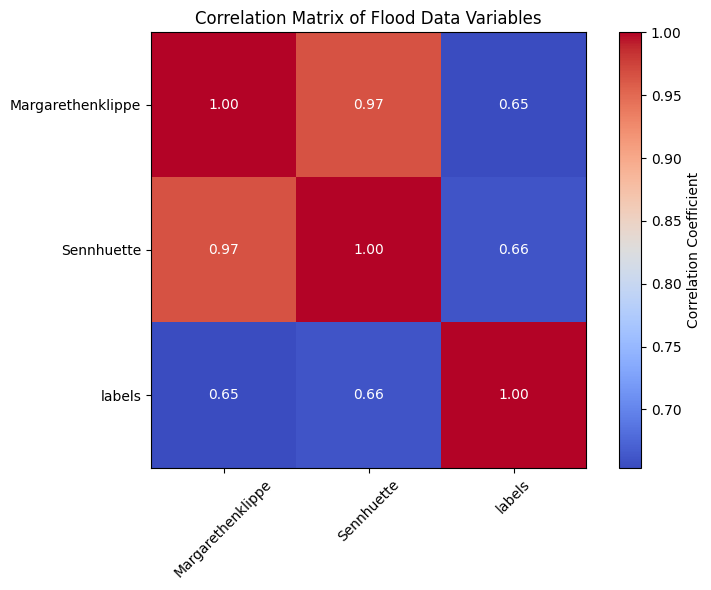

In [23]:
# TODO fill in the missing lines
corr = data.corr()

# TODO plot the correlation matrix using pyplot.imshow
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap='coolwarm')
plt.colorbar(im, label='Correlation Coefficient')
plt.title('Correlation Matrix of Flood Data Variables')

# Add correlation values on the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}',
                 ha='center', va='center',
                 color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


Another interesting plot that may give you a good understanding about the complexity of the dataset is the pairwise relationships. We can use *seaborn* library as below.

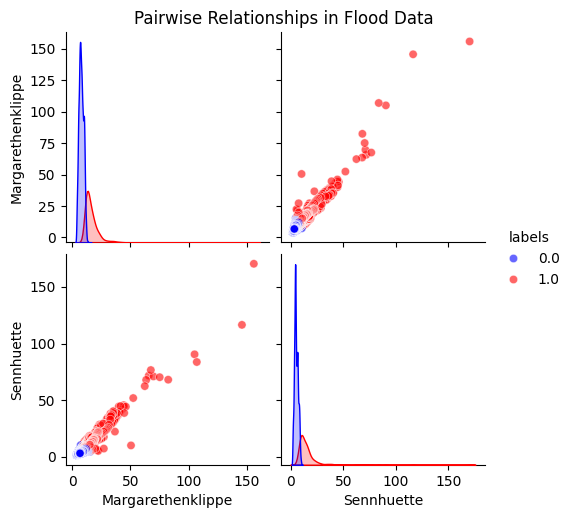

In [26]:
# sns.pairplot(data)

sns.pairplot(data, hue='labels', palette={0: 'blue', 1: 'red'}, plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships in Flood Data', y=1.02)
plt.show()

# Subtask 1.5

### Split the data to inputs and outputs

We consider the data from Margarethenklippe and Sennhuette, i.e. the first two columns, as the input and design a classifier based on the perceptron algorithm to detect flood events.
Therefore, we have:

In [27]:
# TODO fill in the missing lines

X = data[['Margarethenklippe', 'Sennhuette']].values
y = data['labels'].values

print("Input data shape:", X.shape)
print("Output data shape:", y.shape)




Input data shape: (6250, 2)
Output data shape: (6250,)


In [28]:
## TODO print the statistics of the input/output (e.g. count, mean, std, min, max)
print("\nInput Statistics:")
print(pd.DataFrame(X, columns=['Margarethenklippe', 'Sennhuette']).describe())

print("\nOutput Statistics:")
print(pd.Series(y).describe())

# Alternative way to display statistics
print("\nInput Statistics by Class:")
print("Class 0 (Normal):")
print(pd.DataFrame(X[y == 0], columns=['Margarethenklippe', 'Sennhuette']).describe())
print("\nClass 1 (Flood):")
print(pd.DataFrame(X[y == 1], columns=['Margarethenklippe', 'Sennhuette']).describe())


Input Statistics:
       Margarethenklippe   Sennhuette
count        6250.000000  6250.000000
mean           10.553440     7.821264
std             6.396791     6.642199
min             3.700000     1.500000
25%             6.800000     4.000000
50%             9.050000     6.000000
75%            12.400000     9.400000
max           155.800000   170.400000

Output Statistics:
count    6250.000000
mean        0.320800
std         0.466821
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
dtype: float64

Input Statistics by Class:
Class 0 (Normal):
       Margarethenklippe   Sennhuette
count        4245.000000  4245.000000
mean            7.679812     4.802191
std             1.921673     1.719318
min             3.700000     1.500000
25%             6.200000     3.600000
50%             7.500000     4.500000
75%             9.100000     6.100000
max            15.500000    10.300000

Class 1 (Flood):
       Margarethenklippe   Sen

# Subtask 1.6
### Training/validation data and normalization

Let's consider 50% of the data for training and 50% for validation:


In [29]:
# TODO shuffle the samples
np.random.seed(24)
idx = np.arange(len(X))
np.random.shuffle(idx)

X = X[idx]
y = y[idx]
print("Shuffled data - first 5 samples:")
print("X:", X[:5])
print("y:", y[:5])

Shuffled data - first 5 samples:
X: [[13.2 13.4]
 [11.9  6.4]
 [10.6  3.6]
 [ 9.3  9.2]
 [ 5.3  2.7]]
y: [1. 0. 0. 0. 0.]


In [30]:
# TODO split data to train and validation
N_train = int(0.5 * len(X))
x_train, x_test = X[:N_train], X[N_train:]
y_train, y_test = y[:N_train], y[N_train:]
print("\nTraining set size:", x_train.shape[0])
print("Validation set size:", x_test.shape[0])


Training set size: 3125
Validation set size: 3125


In the table of statistics it's easy to see how different the ranges of each feature are. It is good practice to normalize features that use different scales and ranges.

In [31]:
# TODO Normalize both input and the output using the statistics (mean and std) of the training data
mu = x_train.mean(axis=0)
std = x_train.std(axis=0)

print("\nTraining data mean:", mu)
print("Training data std:", std)

# Apply normalization
x_train = (x_train - mu) / std
x_test = (x_test - mu) / std

print("\nAfter normalization:")
print("Training data mean:", x_train.mean(axis=0))
print("Training data std:", x_train.std(axis=0))
print("Test data mean:", x_test.mean(axis=0))
print("Test data std:", x_test.std(axis=0))

# Show some normalized samples
print("\nNormalized training samples (first 5):")
print(x_train[:5])
print("\nNormalized validation samples (first 5):")
print(x_test[:5])


Training data mean: [10.670912  7.963776]
Training data std: [7.13255177 7.31456628]

After normalization:
Training data mean: [-9.62145918e-16 -2.46542342e-15]
Training data std: [1. 1.]
Test data mean: [-0.03293968 -0.03896663]
Test data std: [0.77965423 0.80510214]

Normalized training samples (first 5):
[[ 0.3545839   0.74320524]
 [ 0.17232094 -0.2137893 ]
 [-0.00994202 -0.59658712]
 [-0.19220498  0.16900852]
 [-0.75301409 -0.71962927]]

Normalized validation samples (first 5):
[[ 0.03211866 -0.35050281]
 [-0.64085227 -0.52823036]
 [ 1.02755483  1.31740197]
 [ 0.0040782  -0.33683145]
 [ 0.7611705   1.16701711]]


# Subtask 1.7
### Classification based on the perceptron algorithm.

Let's build and train a model as:
\begin{equation}
y = sign(\mathbf{w}^{\mathtt{T}}X),
\end{equation}
where $\mathbf{w}$ represents the weights. We need to do the following steps:
 - Create the model by initializing the weights.
 - Define the loss function.
 - Train the model. We will use the perceptron algorithm to minimize the loss.

First, let us define a function for plotting the results as:

In [32]:
def plot(w, X, y):
    """ Defines the plot function:
    inputs: w (N + 1) array
            X (M, N) array
            y (M) array
    returns:
    """
    a = -w[1] / w[2]
    xx = np.linspace(X.min(), 0.5 * X.max())
    yy = a * xx + w[0] / w[1]
    fig, ax = plt.subplots(1, 1, figsize = (4, 4))
    ax.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr', label = 'Data')
    ax.plot(xx, yy, 'k', label = 'Classifier')

    ax.set_xlabel('Margarethenklippe')
    ax.set_ylabel('Sennhuette')
#     ax.set_aspect('equal')
    ax.legend()

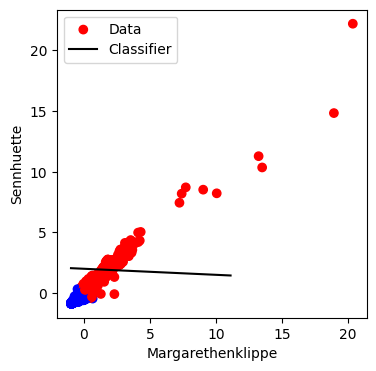

In [41]:
# TODO use the plot function above to show the results for the training data and the suggested weights:
W = [0.1, 0.05, 1.0]
plot(W, x_train, y_train)

## Create the perceptron model as a Python class

We will need the following functions:
- **init**: where you can initialize the model parameters and set the learning rate.
- **loss_fn**: where the loss (or error) needs to be computed by comparing the prediction to the reference data.
- **call**: or the forward pass, where the prediction is made using the previously defined model on the input data.
- **train_step**: where we define the computation performed at one step of training. Here, the model learns and updates its weights.
- **test_step**: where we define the computation performed at one step of evaluation.

In [44]:
class Perceptron():
    """
    Classification model based on the perceptron algorithm.
    """
    def __init__(self, input_dim = 2, lr = 0.001):
        # TODO define the model weights
        self.input_dim = input_dim
        self.W = np.random.rand(input_dim + 1)

        self.lr = lr

        # TODO Define the optimizer. In this case, we use Stochastic Gradient Descent (SGD).

    def loss_fn(self, y_pred, y_true):
        """ Defines the loss function """
        # TODO compute the loss
        loss = np.maximum(0, -y_true * y_pred)
        return loss


    def call(self, inputs):
        """ Defines the computation performed at every call. """
        # TODO run the data through the layer
        inputs = np.hstack([np.ones((len(inputs), 1)), inputs])
        z = np.dot(inputs, self.W)
        outputs = np.sign(z)
        return outputs.reshape((-1, 1))

    def train_step(self, data):
        """ Defines the computation performed at one step of training.
            This typically includes the:
            - forward pass
            - loss calculation
            - weight updates.
            - metric updates.
        """
        inputs, labels = data

        # TODO compute the loss and update the weights

        outputs = self.call(inputs)
        loss = self.loss_fn(outputs, labels)

        inputs = np.hstack([np.ones((len(inputs), 1)), inputs])
        updates = (inputs * loss * self.lr).mean(0)

        self.W += updates

        return (loss**2).mean()

    def test_step(self, data):
        """ Defines the computation performed at one step of evaluation.
            This typically includes the:
            - forward pass
            - loss calculation
            - metric updates.
        """
        inputs, labels = data

        # TODO compute the gradients and update the weights
        outputs = self.call(inputs)
        loss = self.loss_fn(outputs, labels)

        return (loss**2).mean()



## Instantiate the model

In [45]:
# TODO instantiate the model using the Perceptron class you defined
model = Perceptron(input_dim=2, lr=0.01)

print("Initial model weights:", model.W)

Initial model weights: [0.93904226 0.45181681 0.34599183]


# Subtask 1.8
### Train the model

Everything is set for the model to train! Now, we need a training loop:

In [46]:
# TODO fill in the missing lines

num_epochs = 20

hist = {'loss':[], 'val_loss':[]}
# Training loop
for epoch in range(num_epochs):
    # TODO Train loop
    loss = model.train_step((x_train, y_train.reshape(-1, 1)))


    # TODO Test loop
    val_loss = model.test_step((x_test, y_test.reshape(-1, 1)))


    # Print progress
    hist['loss'].append(loss)
    hist['val_loss'].append(val_loss)
    print(f"Epoch {epoch + 1}: train loss = {loss:.4f}, test loss = {val_loss:.4f}")

Epoch 1: train loss = 0.0000, test loss = 0.0000
Epoch 2: train loss = 0.0000, test loss = 0.0000
Epoch 3: train loss = 0.0000, test loss = 0.0000
Epoch 4: train loss = 0.0000, test loss = 0.0000
Epoch 5: train loss = 0.0000, test loss = 0.0000
Epoch 6: train loss = 0.0000, test loss = 0.0000
Epoch 7: train loss = 0.0000, test loss = 0.0000
Epoch 8: train loss = 0.0000, test loss = 0.0000
Epoch 9: train loss = 0.0000, test loss = 0.0000
Epoch 10: train loss = 0.0000, test loss = 0.0000
Epoch 11: train loss = 0.0000, test loss = 0.0000
Epoch 12: train loss = 0.0000, test loss = 0.0000
Epoch 13: train loss = 0.0000, test loss = 0.0000
Epoch 14: train loss = 0.0000, test loss = 0.0000
Epoch 15: train loss = 0.0000, test loss = 0.0000
Epoch 16: train loss = 0.0000, test loss = 0.0000
Epoch 17: train loss = 0.0000, test loss = 0.0000
Epoch 18: train loss = 0.0000, test loss = 0.0000
Epoch 19: train loss = 0.0000, test loss = 0.0000
Epoch 20: train loss = 0.0000, test loss = 0.0000



Final model weights: [0.93904226 0.45181681 0.34599183]


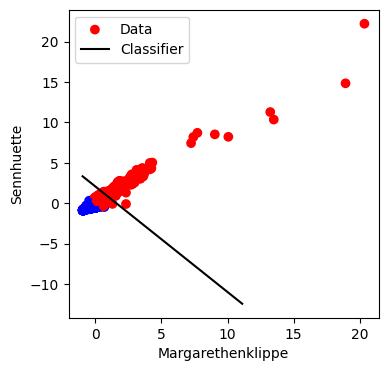

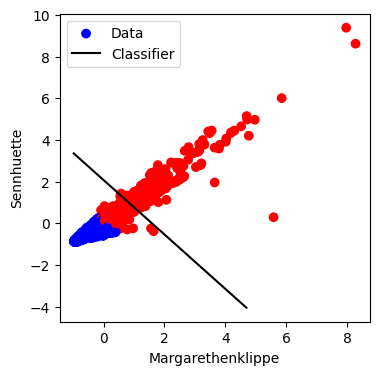

In [48]:
# TODO plot the results for the learned weights using our plot function
print("\nFinal model weights:", model.W)
plot(model.W, x_train, y_train)

# Plot the results on the test data
plot(model.W, x_test, y_test)

# Subtask 1.9

### Plot the training and validation error

Create a plot using pyplot that contains both the losses on training set and the losses on the validation set.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

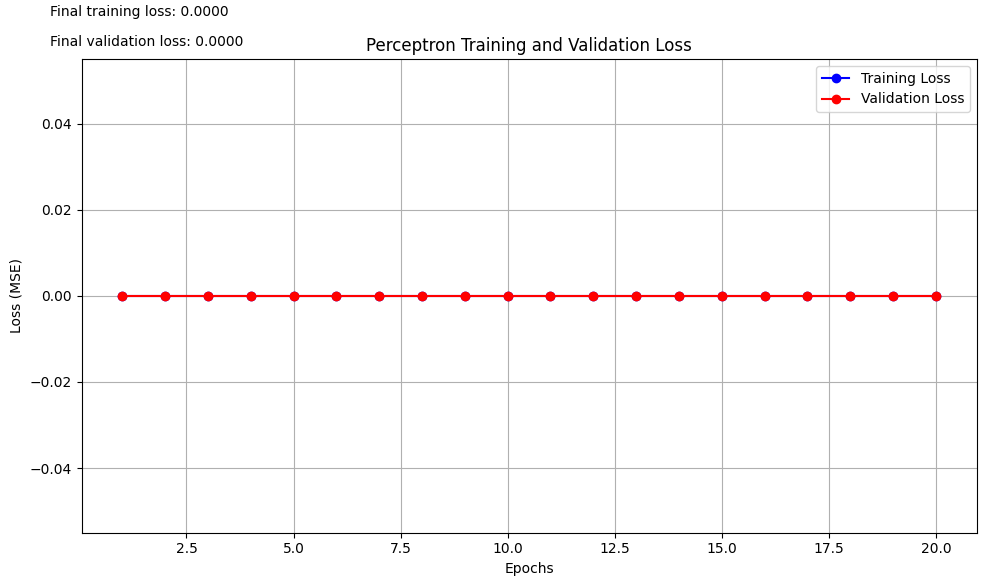

In [52]:
# TODO visualize the model's training progress
plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs + 1)

plt.plot(epochs, hist['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, hist['val_loss'], 'ro-', label='Validation Loss')

plt.title('Perceptron Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.legend()

# Annotate with final loss values
plt.annotate(f'Final training loss: {hist["loss"][-1]:.4f}',
             xy=(0.05, 0.95), xycoords='figure fraction')
plt.annotate(f'Final validation loss: {hist["val_loss"][-1]:.4f}',
             xy=(0.05, 0.90), xycoords='figure fraction')

plt.tight_layout()
plt.show()

# Subtask 1.10

### Plot the confusion matrix

Compute the confusion matrix using the *sklearn* library and plot it using *seaborn.heatmap*.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

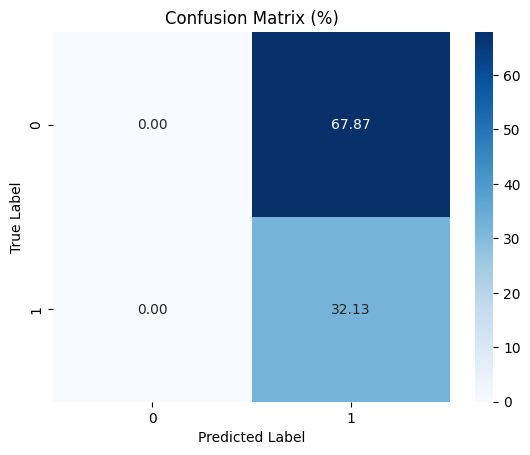

In [55]:
# TODO compute the confusion matrix

y_pred = model.call(x_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm / len(y_test) * 100

# TODO visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()